# Medical Cost Personal Datasets ( Variant 4)

Name: Meshalkin Artur <br>
Student-ID : 586811




In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
df = pd.read_csv('data/insurance.csv') # read csv data as dataframe
df.head() # first 5 elements

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
df.info() # information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.describe() # numerical data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [52]:
df.describe(include='object') # categorical data

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [53]:
df[df.duplicated(keep=False)] # check for duplicates

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [54]:
df.drop_duplicates(inplace=True) # remove duplicates
df.shape

(1337, 7)

In [55]:
df.reset_index(inplace=True, drop=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
df.isnull().mean() * 100 # check for null values in percentage

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

# Numerical data


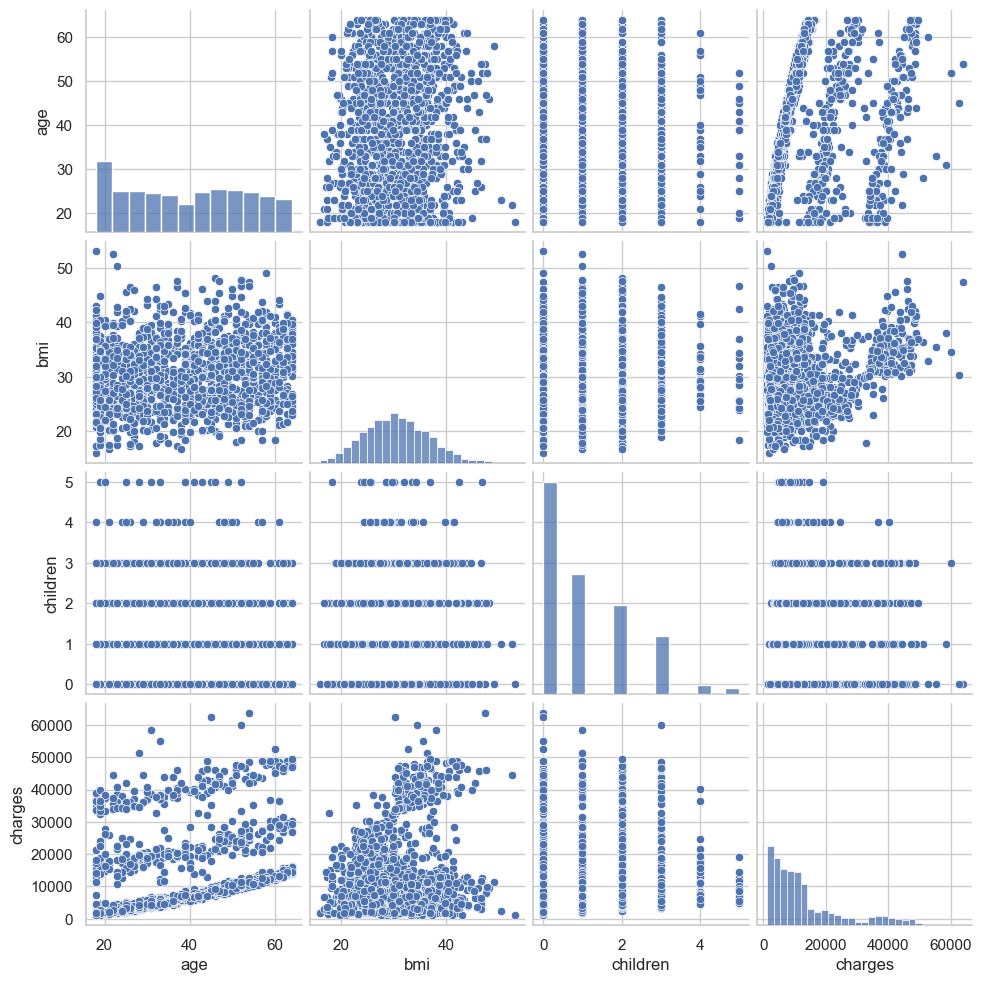

In [57]:
sns.pairplot(df)

/var/folders/lx/p1kcmpm17yj5dk8xtgtjjymh0000gn/T/ipykernel_54113/853678662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

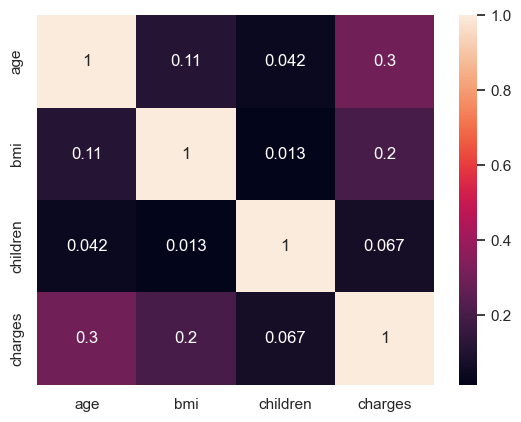

In [58]:
corr = df.corr()
sns.heatmap(corr, annot=True)


# Categorical data

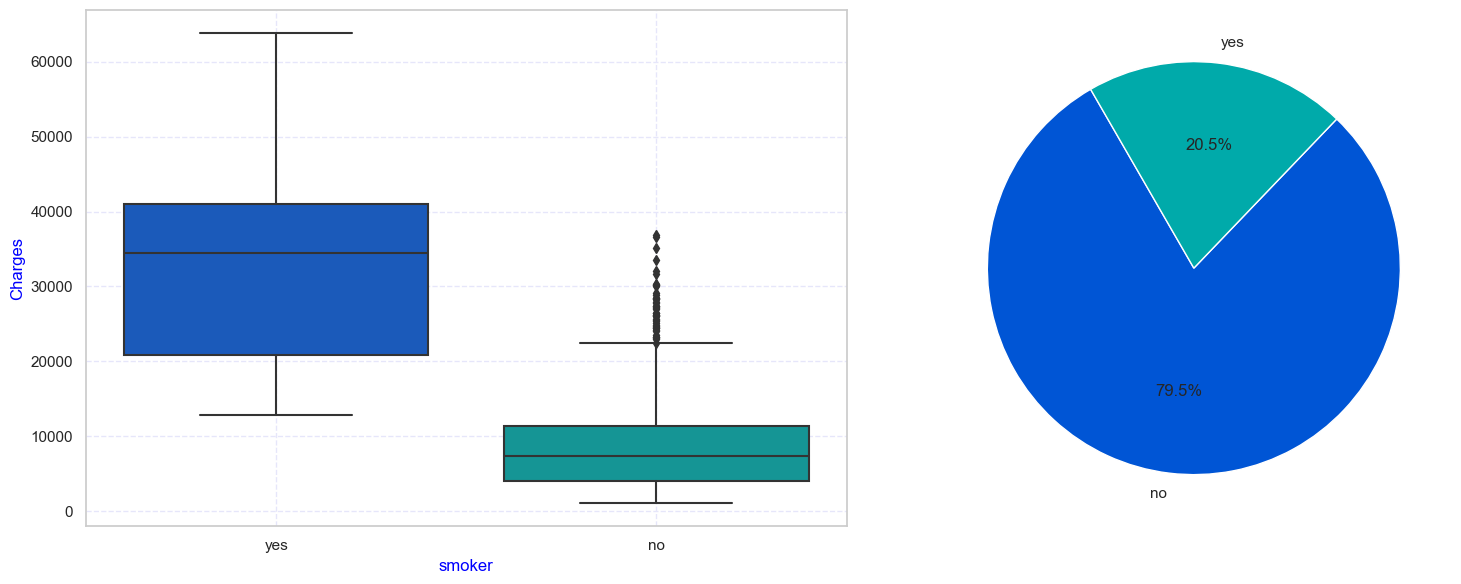

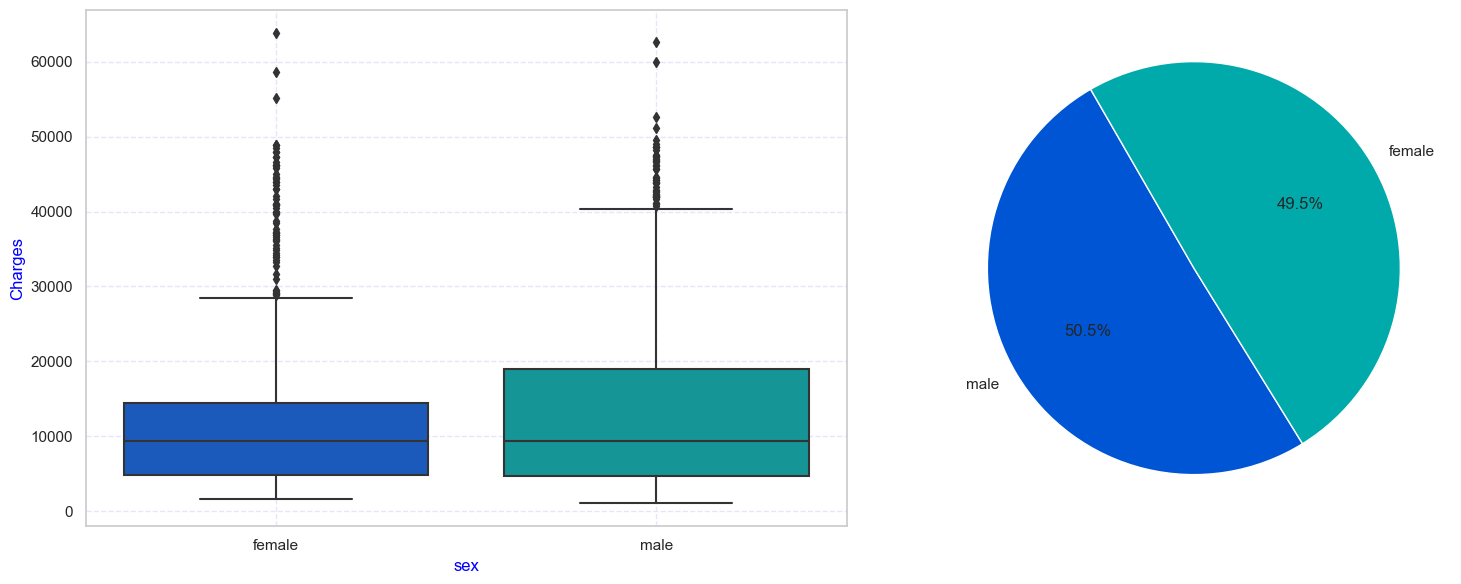

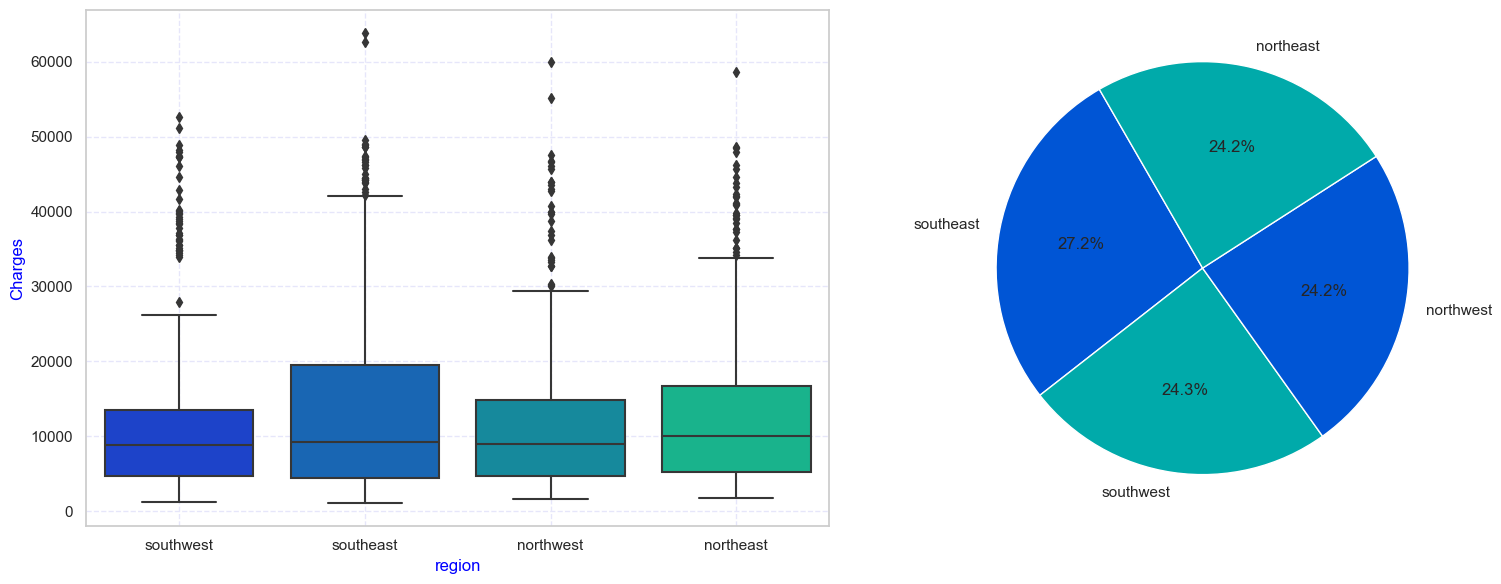

In [59]:
def display_cat(x):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    colors = sns.color_palette("winter", 2)
    sns.boxplot(ax=axes[0], data=df, x=x, y="charges", palette="winter")
    axes[0].set_xlabel(x, fontsize=12, color='blue')
    axes[0].set_ylabel("Charges", fontsize=12, color='blue')
    axes[0].grid(True, linestyle='--', color='lavender')
    smoker_counts = df[x].value_counts()
    axes[1].pie(
        smoker_counts,
        labels=smoker_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=120,
    )
    plt.tight_layout()
    plt.show()


display_cat("smoker")
display_cat("sex")
display_cat("region")

# Target value

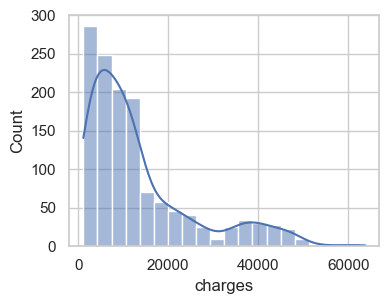

In [60]:
plt.figure(figsize=(4,3))
sns.histplot(df,x="charges",bins=20,kde=True);


# Preprocessing

## StandardScaler

The **StandardScaler** standardizes features by removing the mean and scaling to unit variance.

The formula used is:
$$
z = \frac{x - \mu}{\sigma}
$$
Where:
- $x$ : the original value
- $\mu$: the mean of the feature
- $\sigma$: the standard deviation of the feature
- $z$: the standardized value

This transformation results in a feature with a mean of 0 and a standard deviation of 1s


The **OneHotEncoder** is a method for converting categorical variables into a binary format.
It creates new columns for each category where 1 means the category is present and 0 means it is not <br>
The **OneHotEncoder(drop="first")** transforms categorical variables into binary (0/1) columns, dropping the first category to avoid redundancy.


In [61]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ["sex", "smoker", "region"]
numeric_cols = ["age", "bmi", "children"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

# Linear Regression

Linear Regression is a supervised learning algorithm used to predict a continuous target variable based on the linear relationship between input features (independent variables) and the output (dependent variable).


**Multiple Linear Regression** :

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Where:
- $\hat{y}$ : predicted value
- $\beta_0$ : bias
- $\beta_1, \beta_2, \beta_n $ : weights
- $x_1 , x_2, x_n$: features

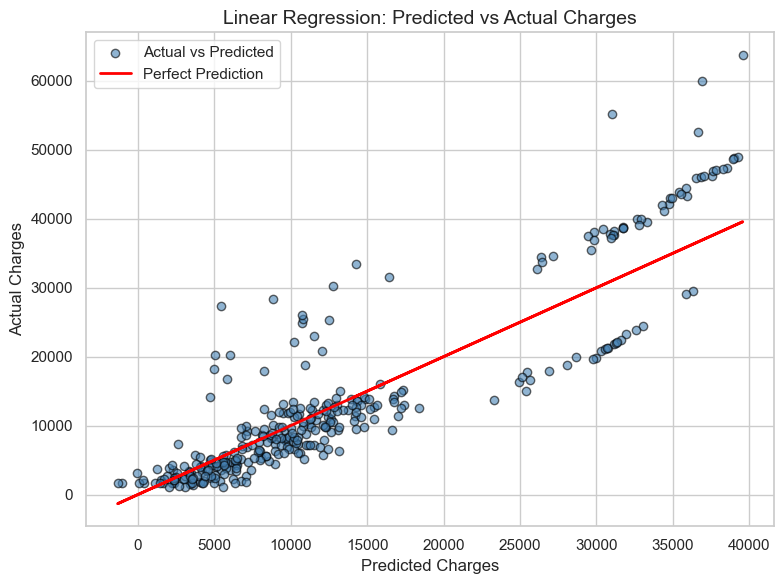

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lin_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])

X = df.drop(['charges'], axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lin_model.fit(X_train, y_train)

y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)

# plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, y_test, alpha=0.6, color='steelblue', edgecolor='black', label='Actual vs Predicted')
plt.plot(y_test_pred, y_test_pred, color='red', linewidth=2, label='Perfect Prediction')

plt.xlabel("Predicted Charges", fontsize=12)
plt.ylabel("Actual Charges", fontsize=12)
plt.title("Linear Regression: Predicted vs Actual Charges", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Loss Function (for training)
Training linear regression is the minimization of the mean squared error(MSE)


$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


Where:

-  $y_i$: actual value
- $\hat{y}_i$: predicted value
- $n$: number of data points

After training, we often use the same MSE to evaluate how well the model is performing on test data. Alternatively, we can use other metrics.

## Metrics (for evaluation)
### **Root Mean Squared Error (RMSE)**
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$
- Same units as the target variable
### **Mean Absolute Error (MAE) , Mean Absolute Percentage Error (MAPE)**
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
- Less sensitive to outliers than MSE
$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}
$$
### **R-squared (Coefficient of Determination)**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2} {\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
- $\bar{y}$ : the mean of the predicted value
- Indicates proportion of variance explained by the model
- Value ranges from 0 to 1 (higher is better)



In [63]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


def display_metrics(y_test,y_test_pred,y_train,y_train_pred):
    mse_train = mean_squared_error(y_train,y_train_pred)
    mse = mean_squared_error(y_test,y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse = np.sqrt(mse)

    r2_train = r2_score(y_train, y_train_pred)
    r2 = r2_score(y_test, y_test_pred)

    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)

    print(f"Train MSE: {round(mse_train,3)} RMSE: {round(rmse_train,3)}, R²: {round(r2_train,3)}, MAPE: {round(mape_train,3)}")
    print("-" * 100)
    print(f"Test MSE:{round(mse,3)} RMSE: {round(rmse,3)}, R²: {round(r2,3)}, MAPE: {round(mape,3)}")


display_metrics(y_test,y_test_pred,y_train,y_train_pred)


Train MSE: 37182190.657 RMSE: 6097.72, R²: 0.73, MAPE: 0.424
----------------------------------------------------------------------------------------------------
Test MSE:35283922.771 RMSE: 5940.027, R²: 0.796, MAPE: 0.4


In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_model, X, y, cv=5, scoring='r2')
print(scores)

[0.76148609 0.70651382 0.77741544 0.73269494 0.7555821 ]


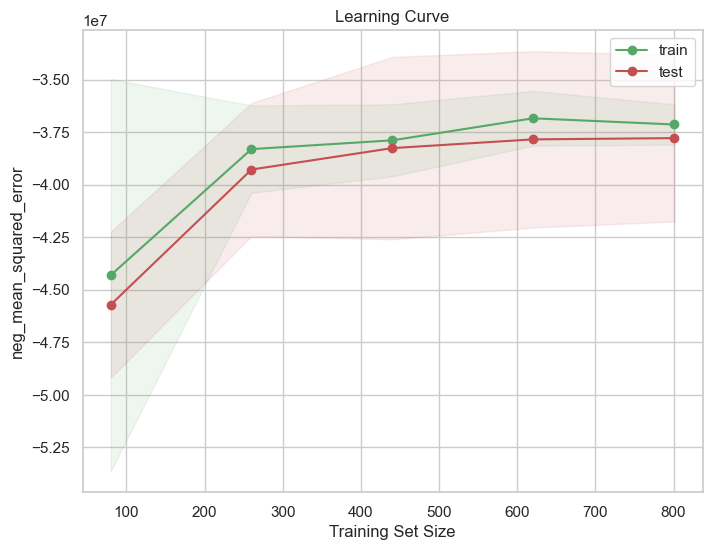

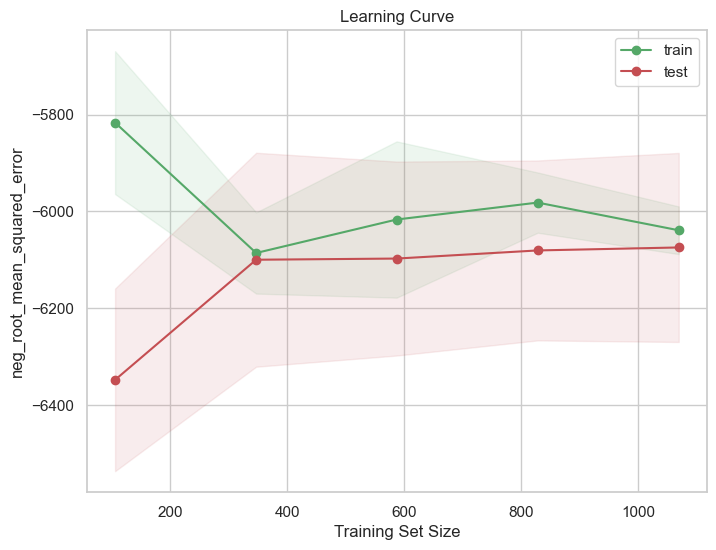

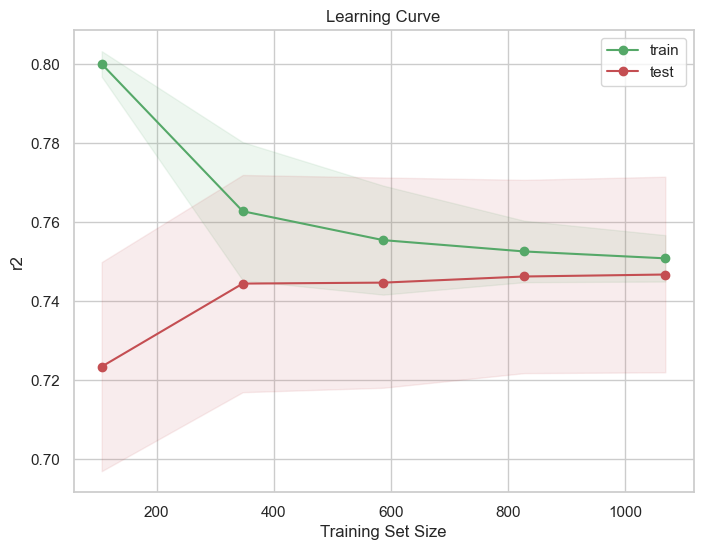

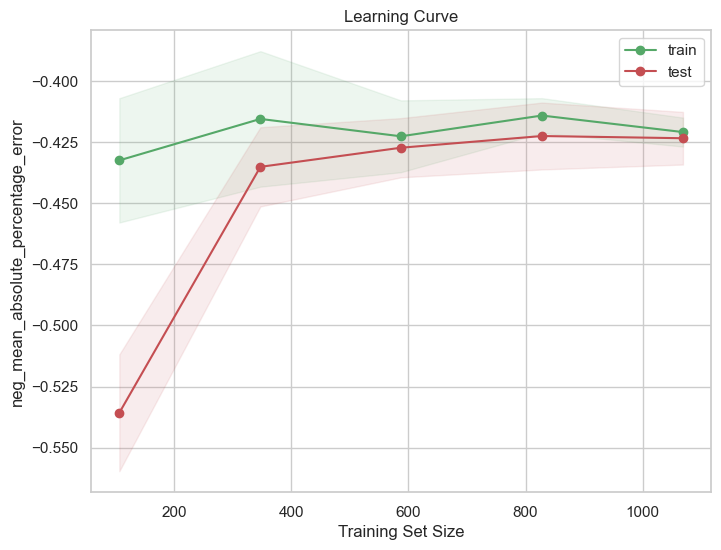

In [65]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(X, y, model,scoring):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)
    plt.subplots(figsize=(8, 6))

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="g")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="r")

    plt.plot(train_sizes, train_mean, label="train", marker='o', color='g')
    plt.plot(train_sizes, test_mean, label="test", marker='o', color='r')

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring)
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(X_train,y_train,lin_model,"neg_mean_squared_error")
plot_learning_curve(X,y,lin_model,scoring="neg_root_mean_squared_error")
plot_learning_curve(X,y,lin_model,scoring="r2")
plot_learning_curve(X,y,lin_model,scoring="neg_mean_absolute_percentage_error")


# Polynomial Regression

- Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as a polynomial in x
$$
\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n
$$

**GridSearchCV** is  used to tune hyperparameters .

It performs **cross-validation** for each combination of hyperparameters and returns the combination that gives the best performance.


In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
poly_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("poly_features", PolynomialFeatures(include_bias=False)),
    ("regressor", LinearRegression())
])
param_grid = {
    "poly_features__degree": [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(poly_model, param_grid=param_grid, cv=3, scoring="r2")
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

results_df = pd.DataFrame(results)

results_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]].head()


,params,mean_test_score,std_test_score,rank_test_score
0,{'poly_features__degree': 1},0.723735,0.018667,3
1,{'poly_features__degree': 2},0.820223,0.023047,1
2,{'poly_features__degree': 3},0.798500,0.027392,2
3,{'poly_features__degree': 4},0.545528,0.079618,4
4,{'poly_features__degree': 5},-5294.531436,4276.574475,5


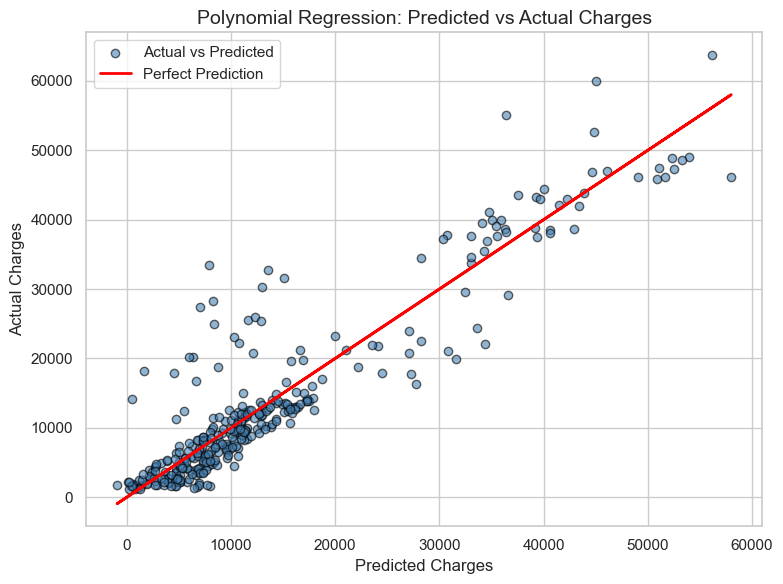

Train MSE: 27972924.307 RMSE: 5288.944, R²: 0.797, MAPE: 0.401
----------------------------------------------------------------------------------------------------
Test MSE:25549318.194 RMSE: 5054.633, R²: 0.852, MAPE: 0.38


In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", LinearRegression())
])
poly_model.fit(X_train, y_train)

y_pred_poly_train = poly_model.predict(X_train)
y_pred_poly_test = poly_model.predict(X_test)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly_test, y_test, alpha=0.6, color='steelblue', edgecolor='black', label='Actual vs Predicted')
plt.plot(y_pred_poly_test, y_pred_poly_test, color='red', linewidth=2, label='Perfect Prediction')

plt.xlabel("Predicted Charges", fontsize=12)
plt.ylabel("Actual Charges", fontsize=12)
plt.title("Polynomial Regression: Predicted vs Actual Charges", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

display_metrics(y_test,y_pred_poly_test,y_train,y_pred_poly_train)


In [68]:
pol_scores = cross_val_score(poly_model, X, y, cv=5, scoring='r2')
print(pol_scores)

[0.8465242  0.79498868 0.88112291 0.81690856 0.83291307]


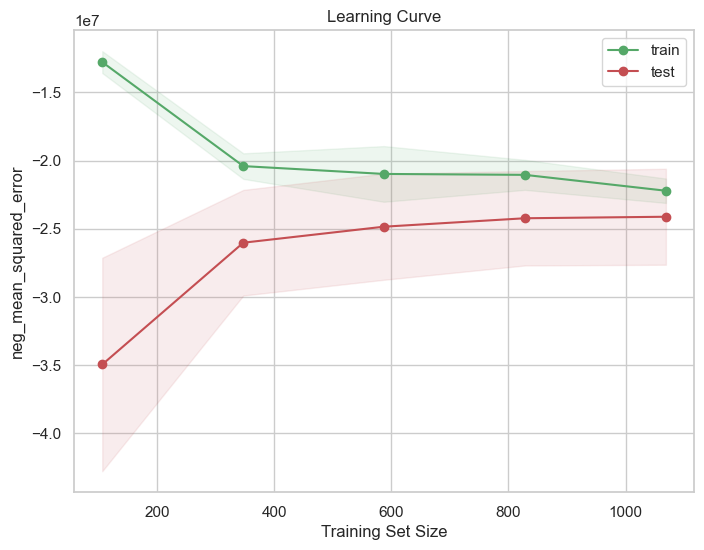

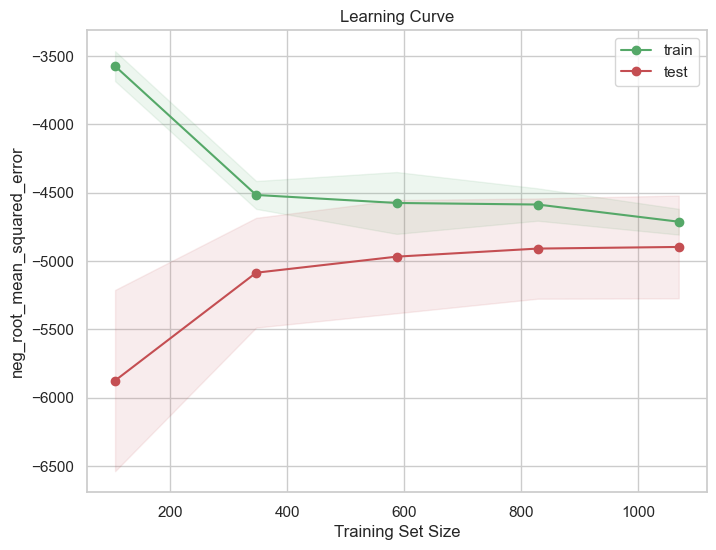

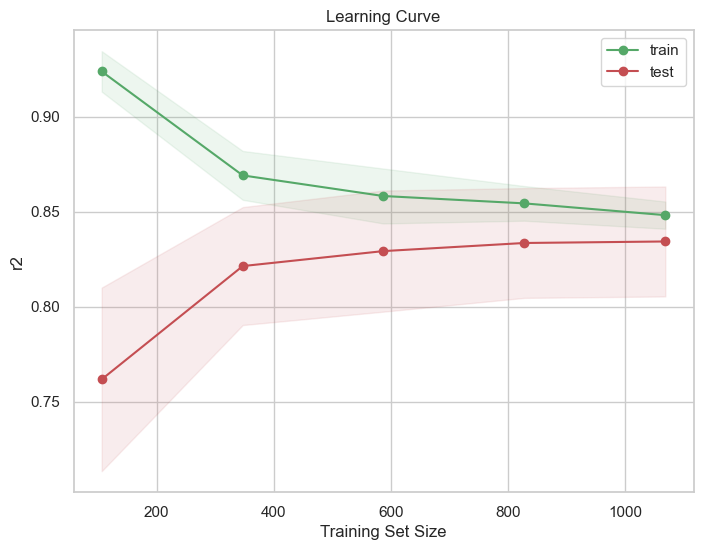

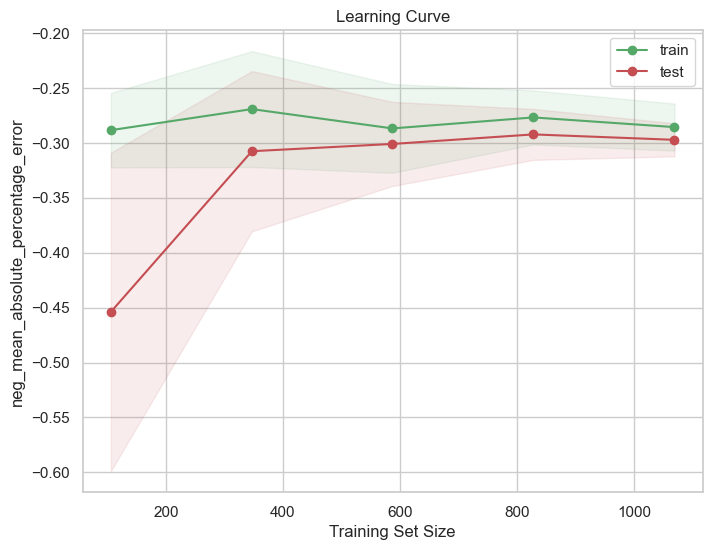

In [69]:
plot_learning_curve(X,y,poly_model,scoring="neg_mean_squared_error")
plot_learning_curve(X,y,poly_model,scoring="neg_root_mean_squared_error")
plot_learning_curve(X,y,poly_model,scoring="r2")
plot_learning_curve(X,y,poly_model,scoring="neg_mean_absolute_percentage_error")

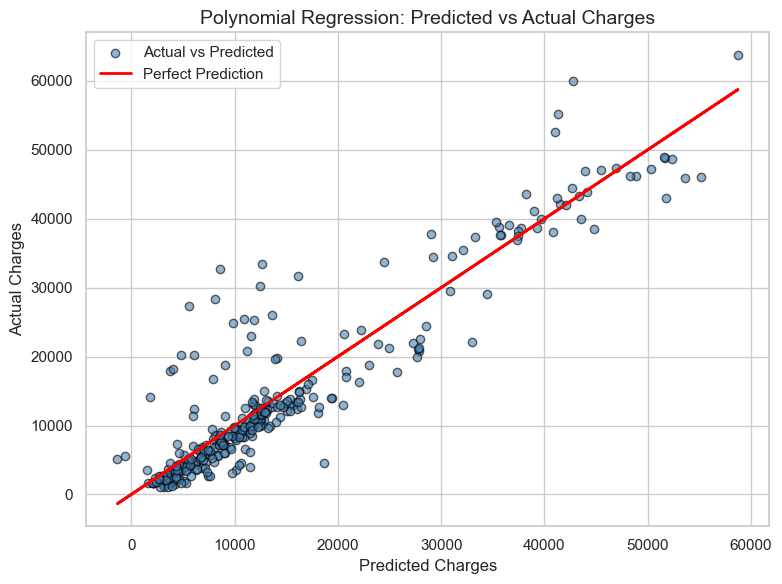

Train MSE: 20705600.698 RMSE: 4550.341, R²: 0.85, MAPE: 0.307
----------------------------------------------------------------------------------------------------
Test MSE:24293362.601 RMSE: 4928.83, R²: 0.86, MAPE: 0.354


In [78]:
poly_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("regressor", LinearRegression())
])
poly_model.fit(X_train, y_train)

y_pred_poly_train = poly_model.predict(X_train)
y_pred_poly_test = poly_model.predict(X_test)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly_test, y_test, alpha=0.6, color='steelblue', edgecolor='black', label='Actual vs Predicted')
plt.plot(y_pred_poly_test, y_pred_poly_test, color='red', linewidth=2, label='Perfect Prediction')

plt.xlabel("Predicted Charges", fontsize=12)
plt.ylabel("Actual Charges", fontsize=12)
plt.title("Polynomial Regression: Predicted vs Actual Charges", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

display_metrics(y_test,y_pred_poly_test,y_train,y_pred_poly_train)

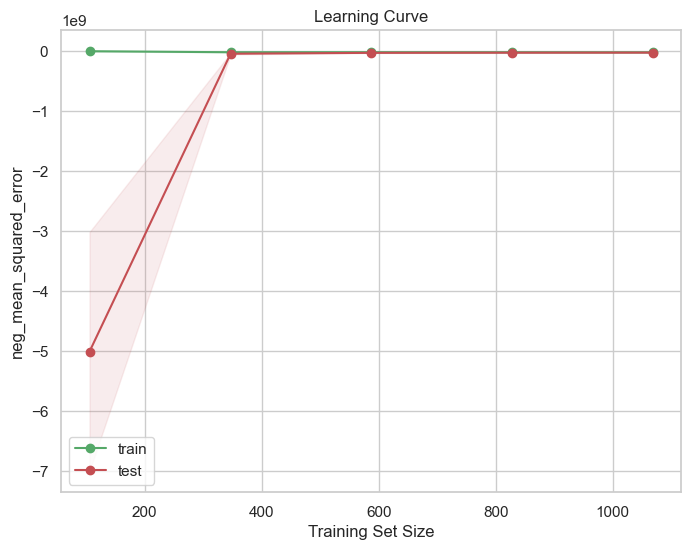

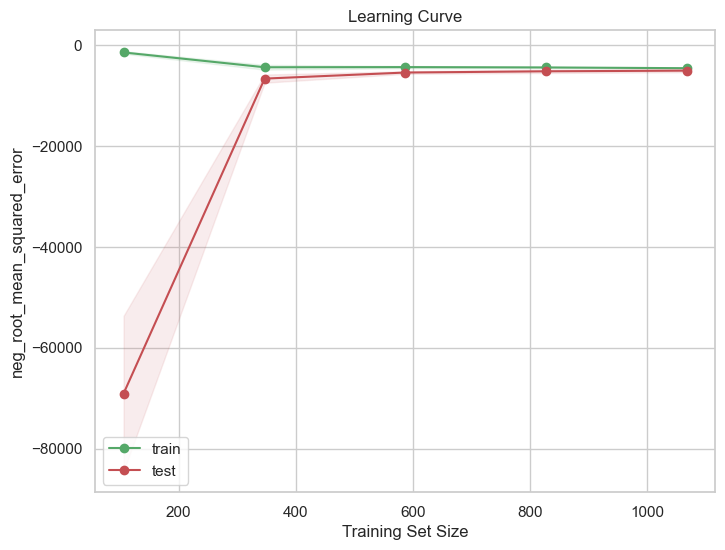

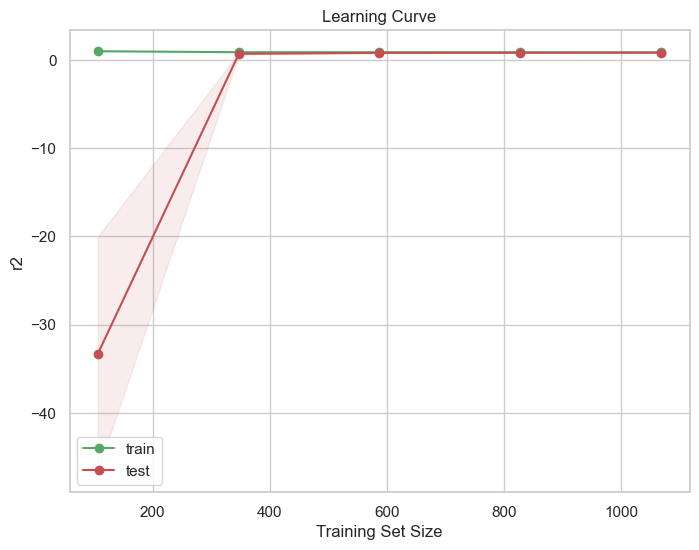

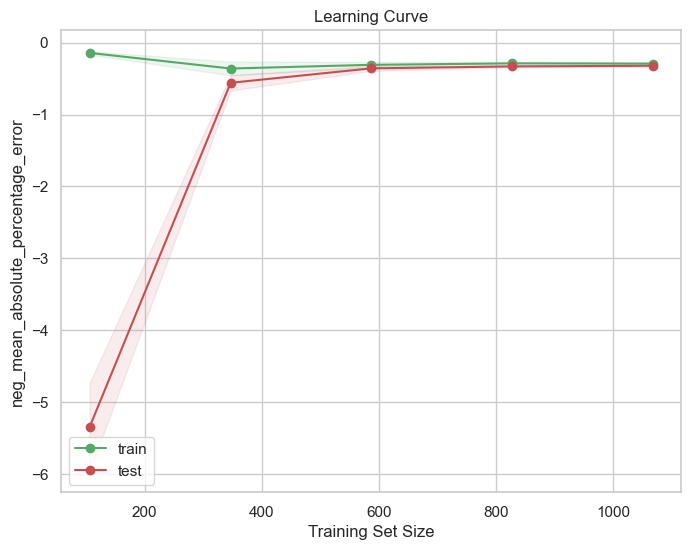

In [79]:
plot_learning_curve(X,y,poly_model,scoring="neg_mean_squared_error")
plot_learning_curve(X,y,poly_model,scoring="neg_root_mean_squared_error")
plot_learning_curve(X,y,poly_model,scoring="r2")
plot_learning_curve(X,y,poly_model,scoring="neg_mean_absolute_percentage_error")

# Logarithm

<Axes: xlabel='charges', ylabel='Count'>

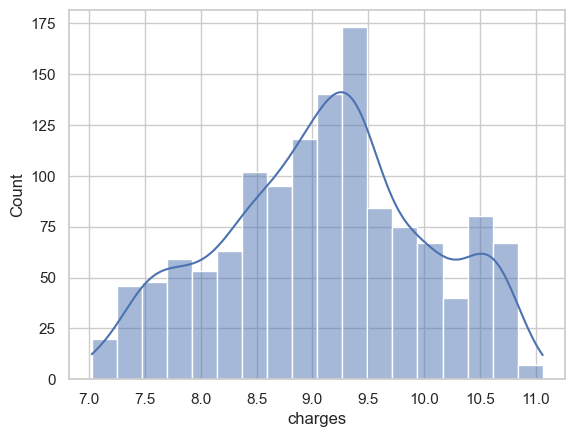

In [80]:
sns.histplot(data = np.log(df['charges']), kde = True)

In [71]:
df['log_charges'] = np.log(df['charges'])
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


In [72]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

X_log = df.drop(['charges', 'log_charges'], axis=1)
y_log = df["log_charges"]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.25, random_state=42)


log_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])
log_model.fit(X_train_log, y_train_log)
y_train_pred_log = log_model.predict(X_train_log)
y_test_pred_log = log_model.predict(X_test_log)
display_metrics(y_test_log,y_test_pred_log,y_train_log,y_train_pred_log)

Train MSE: 0.209 RMSE: 0.457, R²: 0.747, MAPE: 0.031
----------------------------------------------------------------------------------------------------
Test MSE:0.158 RMSE: 0.398, R²: 0.824, MAPE: 0.029


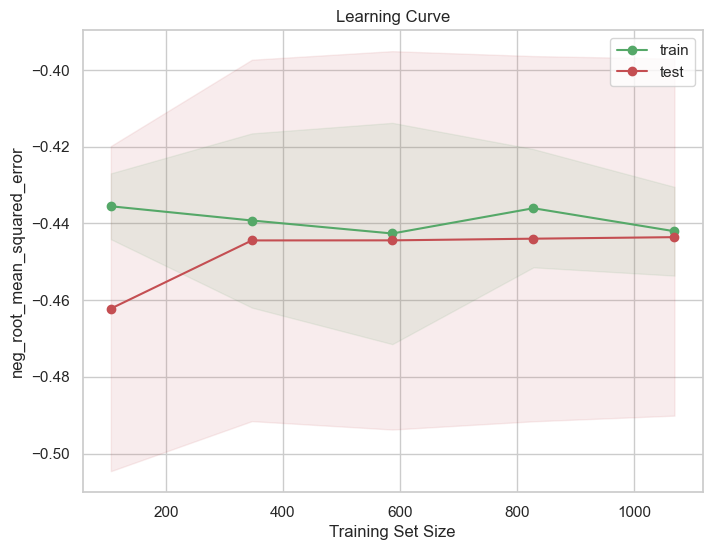

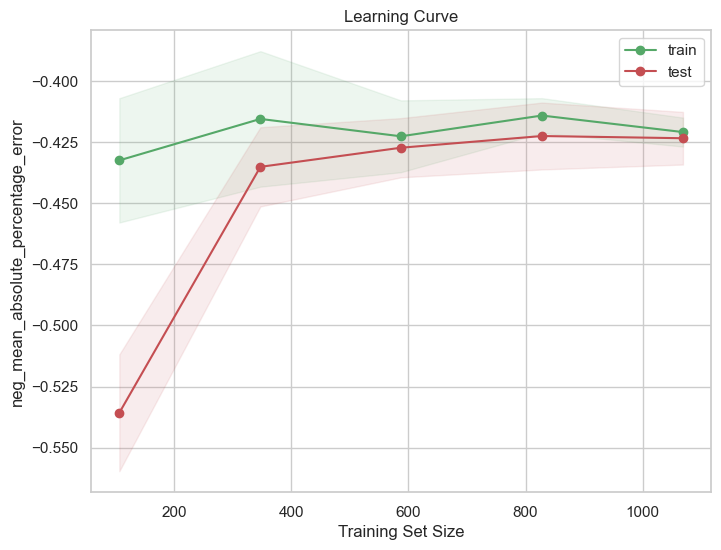

In [73]:
plot_learning_curve(X_log,y_log,log_model,scoring="neg_root_mean_squared_error")
plot_learning_curve(X,y,log_model,scoring="neg_mean_absolute_percentage_error")